In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn import metrics

In [6]:
!pip install gspread
from google.colab import auth
from google.auth import default
import gspread
import pandas as pd

In [8]:
# Authenticate and authorize access to Google Sheets
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [39]:
sheet_url = 'https://docs.google.com/spreadsheets/d/15TaEyIbTU_h1v-ZoOhA93BDs744lE-aSTdRoeaoP7G0/edit?usp=sharing'

In [40]:
sheet = gc.open_by_url(sheet_url)
worksheet = sheet.worksheet('Sheet1') # Replace 'Sheet1' with the name of your worksheet

In [83]:
# Get all data from the worksheet
data = worksheet.get_all_records()

# Convert the data to a Pandas DataFrame
df = pd.DataFrame(data)

# Now you can work with the DataFrame 'df'
df.head()

,JENIS_KAPAL,DERMAGA,DISCHARGE,LOADING,BOXES,JUMLAH_CC,PALKA,BD,SHIFTING,WAG,BAD_WEATHER,DELAY
0,DIRECT,2,356,148,504,3,8,54,30,0,0,0
1,DIRECT,2,360,101,461,3,6,101,10,0,146,0
2,DIRECT,3,1046,452,1498,3,27,0,61,0,780,0
3,DIRECT,2,210,175,385,3,6,130,18,0,0,0
4,DIRECT,4,1468,1750,3218,3,40,55,146,0,0,0


In [52]:
# prompt: change category in delay to text

delay_mapping = {0: 'No Delay', 1: 'Delay <= 4 Hours', 2: 'Delay > 4 Hours'}
df['DELAY'] = df['DELAY'].map(delay_mapping)
df.head()


,JENIS_KAPAL,DERMAGA,DISCHARGE,LOADING,BOXES,JUMLAH_CC,PALKA,BD,SHIFTING,WAG,BAD_WEATHER,DELAY
0,DIRECT,2,356,148,504,3,8,54,30,0,0,No Delay
1,DIRECT,2,360,101,461,3,6,101,10,0,146,No Delay
2,DIRECT,3,1046,452,1498,3,27,0,61,0,780,No Delay
3,DIRECT,2,210,175,385,3,6,130,18,0,0,No Delay
4,DIRECT,4,1468,1750,3218,3,40,55,146,0,0,No Delay


BASIC INFORMATION

In [84]:
#Basic information

df.info()

#Describe the data

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   JENIS_KAPAL  171 non-null    object
 1   DERMAGA      171 non-null    int64 
 2   DISCHARGE    171 non-null    int64 
 3   LOADING      171 non-null    int64 
 4   BOXES        171 non-null    int64 
 5   JUMLAH_CC    171 non-null    int64 
 6   PALKA        171 non-null    int64 
 7   BD           171 non-null    int64 
 8   SHIFTING     171 non-null    int64 
 9   WAG          171 non-null    int64 
 10  BAD_WEATHER  171 non-null    int64 
 11  DELAY        171 non-null    int64 
dtypes: int64(11), object(1)
memory usage: 16.2+ KB


,DERMAGA,DISCHARGE,LOADING,BOXES,JUMLAH_CC,PALKA,BD,SHIFTING,WAG,BAD_WEATHER,DELAY
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,2.953216,646.555556,677.994152,1324.549708,2.748538,16.836257,67.485380,125.081871,82.216374,84.245614,0.467836
std,1.016412,479.525870,518.368941,965.685841,0.574902,10.146403,86.823645,104.907658,244.929317,194.543080,0.820950
min,1.000000,74.000000,37.000000,139.000000,2.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,2.000000,242.000000,247.500000,572.000000,2.000000,8.500000,13.000000,38.500000,0.000000,0.000000,0.000000
50%,3.000000,456.000000,465.000000,830.000000,3.000000,13.000000,42.000000,104.000000,0.000000,0.000000,0.000000
75%,4.000000,1056.000000,1118.000000,2177.000000,3.000000,27.000000,94.000000,192.500000,0.000000,75.500000,1.000000
max,4.000000,1728.000000,2044.000000,3729.000000,4.000000,42.000000,775.000000,415.000000,1731.000000,1188.000000,2.000000


In [85]:
#Change Data Type
df["DERMAGA"]=df["DERMAGA"].astype('category')
df["JENIS_KAPAL"]=df["JENIS_KAPAL"].astype('category')
df["DELAY"]=df["DELAY"].astype('category')

# Handle non-numeric values before conversion
df['DISCHARGE'] = pd.to_numeric(df['DISCHARGE'], errors='coerce')
df['LOADING'] = pd.to_numeric(df['LOADING'], errors='coerce')
df['BOXES'] = pd.to_numeric(df['BOXES'], errors='coerce')
df['JUMLAH_CC'] = pd.to_numeric(df['JUMLAH_CC'], errors='coerce')
df['PALKA'] = pd.to_numeric(df['PALKA'], errors='coerce')
df['BD'] = pd.to_numeric(df['BD'], errors='coerce')
df['SHIFTING'] = pd.to_numeric(df['SHIFTING'], errors='coerce')
df['WAG'] = pd.to_numeric(df['WAG'], errors='coerce')
df['BAD_WEATHER'] = pd.to_numeric(df['BAD_WEATHER'], errors='coerce')

# Convert to integer, filling missing values with 0
df['DISCHARGE'] = df['DISCHARGE'].fillna(0).astype('int64')
df['LOADING'] = df['LOADING'].fillna(0).astype('int64')
df['BOXES'] = df['BOXES'].fillna(0).astype('int64')
df['JUMLAH_CC'] = df['JUMLAH_CC'].fillna(0).astype('int64')
df['PALKA'] = df['PALKA'].fillna(0).astype('int64')
df['BD'] = df['BD'].fillna(0).astype('int64')
df['SHIFTING'] = df['SHIFTING'].fillna(0).astype('int64')
df['WAG'] = df['WAG'].fillna(0).astype('int64')
df['BAD_WEATHER'] = df['BAD_WEATHER'].fillna(0).astype('int64')


In [86]:
#Check The New Data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   JENIS_KAPAL  171 non-null    category
 1   DERMAGA      171 non-null    category
 2   DISCHARGE    171 non-null    int64   
 3   LOADING      171 non-null    int64   
 4   BOXES        171 non-null    int64   
 5   JUMLAH_CC    171 non-null    int64   
 6   PALKA        171 non-null    int64   
 7   BD           171 non-null    int64   
 8   SHIFTING     171 non-null    int64   
 9   WAG          171 non-null    int64   
 10  BAD_WEATHER  171 non-null    int64   
 11  DELAY        171 non-null    category
dtypes: category(3), int64(9)
memory usage: 13.1 KB


In [87]:
# Now you can work with the DataFrame 'df'
df.head()

,JENIS_KAPAL,DERMAGA,DISCHARGE,LOADING,BOXES,JUMLAH_CC,PALKA,BD,SHIFTING,WAG,BAD_WEATHER,DELAY
0,DIRECT,2,356,148,504,3,8,54,30,0,0,0
1,DIRECT,2,360,101,461,3,6,101,10,0,146,0
2,DIRECT,3,1046,452,1498,3,27,0,61,0,780,0
3,DIRECT,2,210,175,385,3,6,130,18,0,0,0
4,DIRECT,4,1468,1750,3218,3,40,55,146,0,0,0


In [57]:
#Find the duplicates

df.duplicated().sum()

0

In [58]:
#Find null values

df.isnull().sum()

,0
JENIS_KAPAL,0
DERMAGA,0
DISCHARGE,0
LOADING,0
BOXES,0
JUMLAH_CC,0
PALKA,0
BD,0
SHIFTING,0
WAG,0


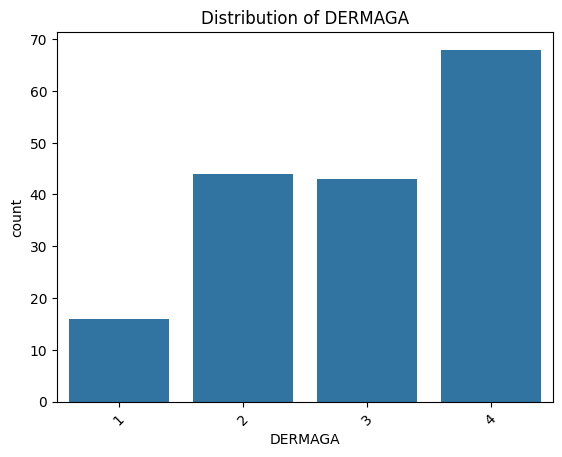

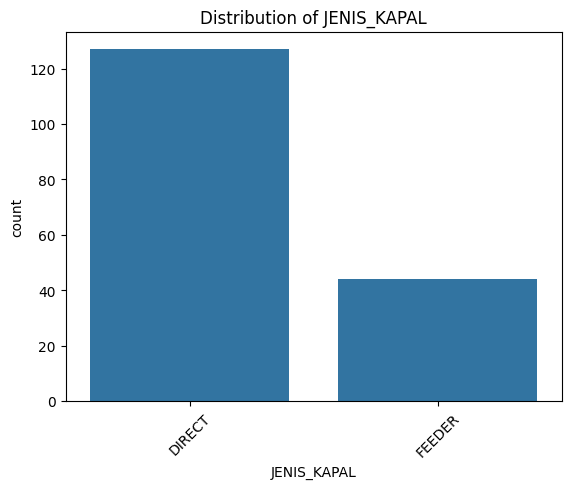

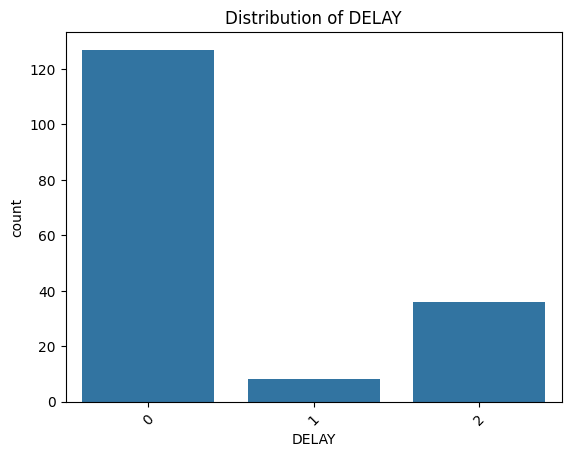

In [88]:
# prompt: data visualization that relevant with the data

import matplotlib.pyplot as plt
import seaborn as sns

# Countplot for categorical variables
sns.countplot(x='DERMAGA', data=df)
plt.title('Distribution of DERMAGA')
plt.xticks(rotation=45)
plt.show()

sns.countplot(x='JENIS_KAPAL', data=df)
plt.title('Distribution of JENIS_KAPAL')
plt.xticks(rotation=45)
plt.show()

sns.countplot(x='DELAY', data=df)
plt.title('Distribution of DELAY')
plt.xticks(rotation=45)
plt.show()




In [89]:
df.groupby('DELAY').size()

<ipython-input-89-92194b43f52d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('DELAY').size()


,0
DELAY,
0,127
1,8
2,36


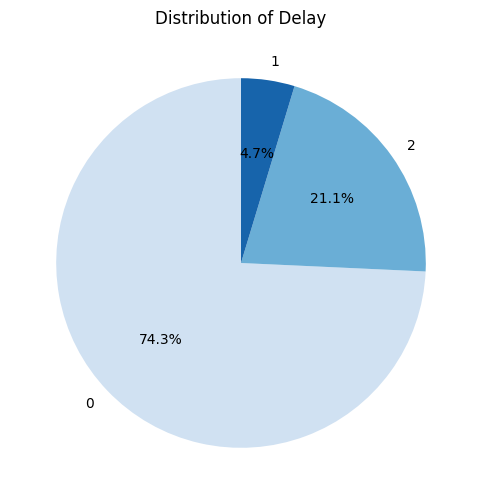

In [90]:
# prompt: pie chart for delay in blue gradation

import matplotlib.pyplot as plt
import numpy as np
# Pie chart for 'DELAY' with blue color palette
delay_counts = df['DELAY'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(delay_counts, labels=delay_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Blues(np.linspace(0.2, 0.8, len(delay_counts))))
plt.title('Distribution of Delay')
plt.show()


SPLIT THE THE DATA TO TRAIN AND TEST DATASET

In [109]:
datatrain, datatest=train_test_split(df,test_size=.2)

In [110]:
arr = datatrain.values
X_train = arr[:, 0:10]
Y_train = arr[:, 11]

In [93]:
datatest.groupby('DELAY').size()


<ipython-input-93-ed9bcc27b365>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  datatest.groupby('DELAY').size()


,0
DELAY,
0,25
1,3
2,7


In [94]:
datatrain.groupby('DELAY').size()

<ipython-input-94-42efa4b172b8>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  datatrain.groupby('DELAY').size()


,0
DELAY,
0,102
1,5
2,29


In [113]:
arr = datatest.values
X_test = arr[:, 0:10]
Y_test = arr[:, 11]

KNN

In [114]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Assuming 'datatrain' is your DataFrame
# ... (your existing code to load and prepare 'datatrain')

# Convert 'DELAY' column to numerical using LabelEncoder
label_encoder = LabelEncoder()
datatrain['DELAY'] = label_encoder.fit_transform(datatrain['DELAY'])
datatrain['JENIS_KAPAL'] = label_encoder.fit_transform(datatrain['JENIS_KAPAL'])

datatest['DELAY'] = label_encoder.fit_transform(datatest['DELAY'])
datatest['JENIS_KAPAL'] = label_encoder.fit_transform(datatest['JENIS_KAPAL'])

# Identify categorical columns (excluding 'DELAY' which is already handled)


# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    datatrain[col] = label_encoder.fit_transform(datatrain[col])

# Extract features and target variable (adjust column indices as needed)
arr = datatrain.values
X_train = arr[:, 0:10]
Y_train = arr[:, 11]

# ... (rest of your code for KNeighborsClassifier)

error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)  # Assuming you have X_test and Y_test defined
    error.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error rata-rata')

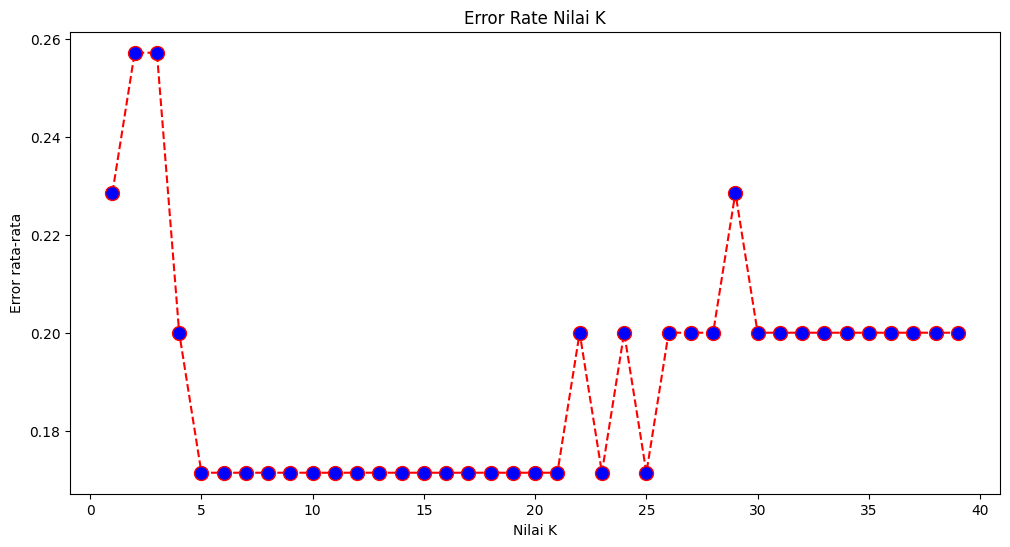

In [115]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate Nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Error rata-rata')

In [119]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,Y_train)
Y_PredKNN=knn.predict(X_test)
accuracy_score(Y_test, Y_PredKNN)

# Evaluate
print(metrics.confusion_matrix(Y_test, Y_PredKNN))

# Print the precision and recall, among other metrics
print(metrics.classification_report(Y_test, Y_PredKNN, digits=3))

[[28  0  0]
 [ 1  0  0]
 [ 5  0  1]]
              precision    recall  f1-score   support

           0      0.824     1.000     0.903        28
           1      0.000     0.000     0.000         1
           2      1.000     0.167     0.286         6

    accuracy                          0.829        35
   macro avg      0.608     0.389     0.396        35
weighted avg      0.830     0.829     0.772        35



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
